In [1]:
import matplotlib.pyplot as plt
import pandas
import numpy
import rba

from rbatools.rba_session import SessionRBA

from matplotlib.gridspec import GridSpec
import seaborn


In [2]:
model_filename = '../../Bacterial-RBA-models/Bacillus-subtilis-168-WT'
Simulation = SessionRBA(model_filename,lp_solver="cplex")
Simulation.add_exchange_reactions()



In [137]:
Simulation.reload_model()
glcs=[0.005,0.0075,0.01,0.0125,0.015,0.0175,0.02]+[0.02+((i+1)*0.0005) for i in range(20)]+[0.03+((i+1)*0.0025) for i in range(18)]
Results_glc_screen={"Mu":[],"M_glc":[],"M_o2":[],"M_ac":[],"P_TA_machinery":[],"Eatp_enzyme":[]}
for glc_conc in glcs:
    print(glc_conc)
    Simulation.set_medium({'M_glc':glc_conc})
    mumax=Simulation.find_max_growth_rate(max=1.0,start_value=0.3)
    J_ex=Simulation.return_exchange_fluxes()
    for i in Results_glc_screen.keys():
        if i =="Mu":
            Results_glc_screen["Mu"].append(mumax)
        else:
            if i in J_ex.keys():
                Results_glc_screen[i].append(J_ex[i])
            elif i in Simulation.Problem.SolutionValues.keys():
                Results_glc_screen[i].append(Simulation.Problem.SolutionValues[i])
            else:
                Results_glc_screen[i].append(0)

0.005
0.0075
0.01
0.0125
0.015
0.0175
0.02
0.0205
0.021
0.021500000000000002
0.022
0.0225
0.023
0.0235
0.024
0.0245
0.025
0.025500000000000002
0.026000000000000002
0.026500000000000003
0.027
0.0275
0.028
0.0285
0.029
0.0295
0.03
0.0325
0.034999999999999996
0.0375
0.04
0.042499999999999996
0.045
0.0475
0.05
0.0525
0.055
0.057499999999999996
0.06
0.0625
0.065
0.0675
0.07
0.07250000000000001
0.075


In [138]:
glc_WT=abs(Results_glc_screen['M_glc'][glcs.index(0.025)])
mu_WT=abs(Results_glc_screen['Mu'][glcs.index(0.025)])
o2_WT=abs(Results_glc_screen['M_o2'][glcs.index(0.025)])
ac_WT=abs(Results_glc_screen['M_ac'][glcs.index(0.025)])
P_TA_WT=abs(Results_glc_screen['P_TA_machinery'][glcs.index(0.025)])
Eatp_enzyme_WT=abs(Results_glc_screen['Eatp_enzyme'][glcs.index(0.025)])

glc_WT_05=abs(Results_glc_screen['M_glc'][glcs.index(0.05)])
mu_WT_05=abs(Results_glc_screen['Mu'][glcs.index(0.05)])
o2_WT_05=abs(Results_glc_screen['M_o2'][glcs.index(0.05)])
ac_WT_05=abs(Results_glc_screen['M_ac'][glcs.index(0.05)])

In [54]:
Simulation.reload_model()

Simulation.set_medium({'M_glc':0.025})
Mus_RVA=[mu_WT*i for i in [0.01,0.025,0.05,0.075,0.1,0.125,0.15,0.175,0.2,0.225,0.25,0.275,0.3,0.325,0.35,0.375,0.4,0.425,0.45,0.475,0.5,0.525,0.55,0.575,0.6,0.625,0.65,0.675,0.7,0.725,0.75,0.775,0.8,0.825,0.85,0.875,0.9,0.925,0.95,0.975,0.9825,0.99,0.9925,0.995,0.9975,1]]
Reactions_to_check=["R_EX_glc_e","R_EX_o2_e","R_EX_ac_e","P_TA_machinery","P_CHP_machinery","TptsG_enzyme","Eatp_enzyme"]
Feasible_Ranges=dict(zip(Reactions_to_check,[{"Minima":[],"Maxima":[]},
                                             {"Minima":[],"Maxima":[]},
                                             {"Minima":[],"Maxima":[]},
                                             {"Minima":[],"Maxima":[]},
                                             {"Minima":[],"Maxima":[]},
                                             {"Minima":[],"Maxima":[]},
                                             {"Minima":[],"Maxima":[]}]))

for mu in Mus_RVA:
    Simulation.set_growth_rate(mu)
    Feasible_range=Simulation.get_feasible_range(variables=Reactions_to_check)
    for rxn in Reactions_to_check:
        Feasible_Ranges[rxn]["Minima"].append(Feasible_range[rxn]['Min'])
        Feasible_Ranges[rxn]["Maxima"].append(Feasible_range[rxn]['Max'])



In [9]:
title_font_size=18
ticklabel_fontsize=13
axislabel_fontsize=16
labelpad_axislables=0.5

In [119]:
glucose_color="#2E4DA7"
oxygen_color="#DC5964"
#acetate_color="#6DA7A4"
#acetate_color="#158582"
#acetate_color="#CFA716"
acetate_color="#E6B327"
growth_rate_color="#AAAABC"
contrast_line_color="#454555"

#dark_mud="#DDAA66"
#dark_mud="#CFA716"
dark_mud="#E6B327"
#light_mud="#FFE8AA"
light_mud="#FFF7D6"
lila_wolf="#DDCCFF"
red_wolf="#FFBFBF"

In [115]:
def plot_glc_screen(ax,input_data,glucose_concentrations):
    ax2=ax.twinx()
    ax2.plot(glucose_concentrations,[i for i in input_data["M_ac"]],linewidth=3,color=acetate_color,alpha=1,label="$Acetate$ excretion")
    ax2.plot(glucose_concentrations,[-i for i in input_data["M_o2"]],linewidth=3,color=oxygen_color,alpha=1,label="$O_2$ uptake",linestyle=(0, (1, 1)))
    ax2.plot(glucose_concentrations,[-i for i in input_data["M_glc"]],linewidth=3,color=glucose_color,alpha=1,label="$Glucose$ uptake",linestyle=(0, (3, 1, 1, 1)))
    ax.plot([0.025,0.025],[0,1],linestyle="dashed",color=contrast_line_color,linewidth=2)
    ax.plot(glucose_concentrations,input_data["Mu"],linewidth=4,alpha=1,color=growth_rate_color,label="Monod curve")
    ax.legend(loc="center right",frameon=False,fontsize=12,bbox_to_anchor=(0.91, 0.4),labelspacing=0.3)
    #ax.legend(loc="center right",frameon=False,fontsize=12,bbox_to_anchor=(0.92, 0.4),labelspacing=0.3)
    ax2.legend(loc="lower right",fontsize=12,frameon=False,labelspacing=0.3)
    ax.set_title("Glucose screen: cellular states",fontsize=title_font_size)
    ax.set_xlabel("Glucose concentration [$mM$]",fontsize=axislabel_fontsize,labelpad=labelpad_axislables)
    ax.set_ylim(-0.01,0.69)
    ax.set_xlim(0.004,0.079)
    ax.tick_params(axis='y', labelcolor=growth_rate_color)
    ax2.tick_params(axis='y', labelcolor="#3B4856")
    ax.set_ylabel("Growth-rate [$h^{-1}$]",color=growth_rate_color,fontsize=axislabel_fontsize,labelpad=labelpad_axislables)
    #ax2.set_ylabel('Exchange fluxes ($\\frac{mmol}{h \\times g_{DW}}$)',color="black",fontsize=12)
    ax2.set_ylabel('Fluxes [mmol (h $g_{DW}$)$^{-1}$]',color=contrast_line_color,fontsize=axislabel_fontsize,labelpad=labelpad_axislables)
    ax2.set_ylim(-0.2,15.6)
    ax.set_yticks([0.1,0.2,0.3,0.4,0.5,0.6])
    ax.set_yticklabels([0.1,0.2,0.3,0.4,0.5,0.6],rotation=90,va='center',fontsize=ticklabel_fontsize)
    ax.set_xticks([0.01,0.02,0.03,0.04,0.05,0.06,0.07])
    ax.set_xticklabels([0.01,0.02,0.03,0.04,0.05,0.06,0.07],fontsize=ticklabel_fontsize)
    ax2.set_yticks([2,4,6,8,10,12,14])
    ax2.set_yticklabels([2,4,6,8,10,12,14],fontsize=ticklabel_fontsize)
    

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  after removing the cwd from sys.path.


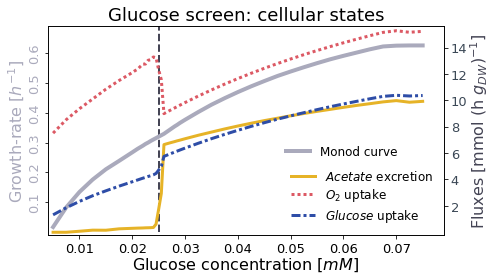

In [120]:
fig = plt.figure(figsize=(7,4),constrained_layout=True)
ax = fig.add_subplot(111)
plot_glc_screen(ax=ax,input_data=Results_glc_screen,glucose_concentrations=glcs)
plt.tight_layout()


In [117]:
def plot_RVA(ax,input_data,mu_WT,o2_WT,glc_WT,growth_rates):
    ax.axvline(1,color=contrast_line_color,linestyle="dashed",linewidth=2, zorder=1)
    ax.fill_between(x=[i/mu_WT for i in growth_rates],y1=input_data["R_EX_glc_e"]["Minima"],y2=input_data["R_EX_glc_e"]["Maxima"],interpolate=True,color=glucose_color,alpha=0.4, zorder=2)
    ax.plot([i/mu_WT for i in growth_rates],input_data["R_EX_glc_e"]["Minima"],color=glucose_color,alpha=1,linewidth=2,linestyle=(0, (3, 1, 1, 1)), zorder=2)
    ax.plot([i/mu_WT for i in growth_rates],input_data["R_EX_glc_e"]["Maxima"],color=glucose_color,alpha=1,linewidth=2,linestyle=(0, (3, 1, 1, 1)), zorder=2)
    if glc_WT is not None:
        ax.scatter([1],[glc_WT],color=glucose_color,s=50, zorder=3)

    ax2=ax.twinx()
    ax2.fill_between(x=[i/mu_WT for i in growth_rates],y1=input_data["R_EX_o2_e"]["Minima"],y2=input_data["R_EX_o2_e"]["Maxima"],interpolate=True,color=oxygen_color,alpha=0.3, zorder=2)
    ax2.plot([i/mu_WT for i in growth_rates],input_data["R_EX_o2_e"]["Minima"],color=oxygen_color,alpha=1,linewidth=2,linestyle=(0, (1, 1)), zorder=2)
    ax2.plot([i/mu_WT for i in growth_rates],input_data["R_EX_o2_e"]["Maxima"],color=oxygen_color,alpha=1,linewidth=2,linestyle=(0, (1, 1)), zorder=2)
    if o2_WT is not None:
        ax2.scatter([1],[o2_WT],color=oxygen_color,s=50, zorder=3)

    ax.tick_params(axis='y', labelcolor=glucose_color)
    ax2.tick_params(axis='y', labelcolor=oxygen_color)
    ax.set_ylim(0.5,7.25)
    ax.set_yticks([1,2,3,4,5,6,7])
    ax.set_yticklabels([1,2,3,4,5,6,7],fontsize=ticklabel_fontsize)

    ax.set_xlim(0,1.05)
    ax2.set_ylim(1,24)
    ax2.set_yticks([5,10,15,20])
    ax2.set_yticklabels([5,10,15,20],fontsize=ticklabel_fontsize)

    ax.set_xticks([0,0.2,0.4,0.6,0.8,1])
    ax.set_xticklabels([0,0.2,0.4,0.6,0.8,1],fontsize=ticklabel_fontsize)

    ax.set_ylabel('$Glucose$ [mmol (h $g_{DW}$)$^{-1}$]',color=glucose_color,fontsize=axislabel_fontsize,labelpad=labelpad_axislables)
    ax2.set_ylabel('$O_2$ [mmol (h $g_{DW}$)$^{-1}$]',color=oxygen_color,fontsize=axislabel_fontsize,labelpad=labelpad_axislables)

    plt.title('Feasible uptake fluxes vs. growth-rate',fontsize=title_font_size)
    ax.set_xlabel('Relative fitness',fontsize=axislabel_fontsize,labelpad=labelpad_axislables)


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  after removing the cwd from sys.path.


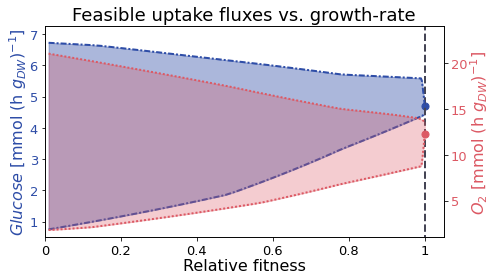

In [38]:
fig = plt.figure(figsize=(7,4),constrained_layout=True)
ax = fig.add_subplot(111)
plot_RVA(ax=ax,input_data=Feasible_Ranges,mu_WT=mu_WT,o2_WT=o2_WT,glc_WT=glc_WT,growth_rates=Mus_RVA)
plt.tight_layout()


In [142]:
def plot_RVA_machinery(ax,input_data,mu_WT,P_TA_machinery_WT,Eatp_enzyme_WT,growth_rates):
    ax.axvline(1,color=contrast_line_color,linestyle="dashed",linewidth=2, zorder=1)
    ax.fill_between(x=[i/mu_WT for i in growth_rates],y1=input_data["P_TA_machinery"]["Minima"],y2=input_data["P_TA_machinery"]["Maxima"],interpolate=True,color=dark_mud,alpha=0.35, zorder=2)
    ax.plot([i/mu_WT for i in growth_rates],input_data["P_TA_machinery"]["Minima"],color=dark_mud,alpha=1,linewidth=2, zorder=2)
    ax.plot([i/mu_WT for i in growth_rates],input_data["P_TA_machinery"]["Maxima"],color=dark_mud,alpha=1,linewidth=2, zorder=2)
    if P_TA_machinery_WT is not None:
        ax.scatter([1],[P_TA_machinery_WT],color=dark_mud,s=50, zorder=3)

    ax2=ax.twinx()
    ax2.fill_between(x=[i/mu_WT for i in growth_rates],y1=input_data["Eatp_enzyme"]["Minima"],y2=input_data["Eatp_enzyme"]["Maxima"],interpolate=True,color="#324B4A",alpha=0.3, zorder=1)
    ax2.plot([i/mu_WT for i in growth_rates],input_data["Eatp_enzyme"]["Minima"],color="#324B4A",alpha=1,linewidth=2, zorder=1)
    ax2.plot([i/mu_WT for i in growth_rates],input_data["Eatp_enzyme"]["Maxima"],color="#324B4A",alpha=1,linewidth=2, zorder=1)
    if Eatp_enzyme_WT is not None:
        ax2.scatter([1],[Eatp_enzyme_WT],color="#324B4A",s=50, zorder=2)

    ax.tick_params(axis='y', labelcolor=dark_mud)
    ax2.tick_params(axis='y', labelcolor="#324B4A")

    ax.set_xlim(0,1.05)
    ax.set_xticks([0,0.2,0.4,0.6,0.8,1])
    ax.set_xticklabels([0,0.2,0.4,0.6,0.8,1],fontsize=ticklabel_fontsize)

    ax.set_ylabel('$Ribosomes$ [mmol / $g_{DW}$]',color=dark_mud,fontsize=axislabel_fontsize,labelpad=labelpad_axislables)
    ax2.set_ylabel('$ATP synthase$ [mmol / $g_{DW}$]',color="#324B4A",fontsize=axislabel_fontsize,labelpad=labelpad_axislables)

    plt.title('Feasible machinery concentrations',fontsize=title_font_size)
    ax.set_xlabel('Relative fitness',fontsize=axislabel_fontsize,labelpad=labelpad_axislables)


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  after removing the cwd from sys.path.


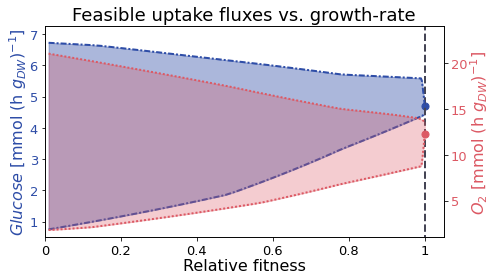

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  # Remove the CWD from sys.path while we load stuff.


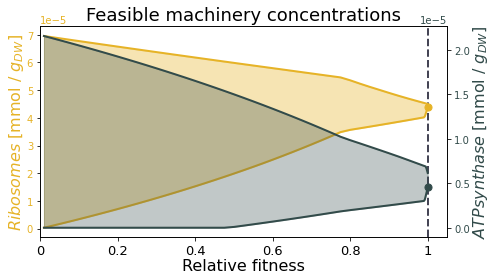

In [143]:
fig = plt.figure(figsize=(7,4),constrained_layout=True)
ax = fig.add_subplot(111)
plot_RVA(ax=ax,input_data=Feasible_Ranges,mu_WT=mu_WT,o2_WT=o2_WT,glc_WT=glc_WT,growth_rates=Mus_RVA)
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(7,4),constrained_layout=True)
ax = fig.add_subplot(111)
plot_RVA_machinery(ax=ax,input_data=Feasible_Ranges,mu_WT=mu_WT,P_TA_machinery_WT=P_TA_WT,Eatp_enzyme_WT=Eatp_enzyme_WT,growth_rates=Mus_RVA)
plt.tight_layout()
plt.show()


In [126]:
Feasible_Ranges

{'R_EX_glc_e': {'Minima': [0.7542992866404687,
   0.7852778756796787,
   0.8374718783406101,
   0.8903933030623288,
   0.9440831925401127,
   0.998541339746577,
   1.0537957152678383,
   1.1098645635501079,
   1.1667679044420072,
   1.2245319944264672,
   1.2831758355120049,
   1.3427284450324959,
   1.4032156548773624,
   1.4646642803032623,
   1.5271021671326945,
   1.5905005407234127,
   1.654928241148769,
   1.7204235367408867,
   1.7870183031829225,
   1.8547456928626542,
   1.952346651886181,
   2.0618699232739206,
   2.1735536164744738,
   2.2874755430771567,
   2.403717249446122,
   2.5223642437606157,
   2.6435062397884996,
   2.7672374188983904,
   2.8936567119005723,
   3.022868102492013,
   3.1549809542766765,
   3.2901103635112525,
   3.4141265942437435,
   3.534656665151659,
   3.6566939265092167,
   3.780268770177603,
   3.9054134037222132,
   4.032161762592638,
   4.160549453032663,
   4.2906137190925975,
   4.329965699452406,
   4.369473136542451,
   4.385281574023628,

In [127]:
Mus_RVA

[0.0031982421875,
 0.00799560546875,
 0.0159912109375,
 0.02398681640625,
 0.031982421875,
 0.03997802734375,
 0.0479736328125,
 0.05596923828124999,
 0.06396484375,
 0.07196044921875,
 0.0799560546875,
 0.08795166015625001,
 0.095947265625,
 0.10394287109375,
 0.11193847656249999,
 0.11993408203125,
 0.1279296875,
 0.13592529296875,
 0.1439208984375,
 0.15191650390625,
 0.159912109375,
 0.16790771484375,
 0.17590332031250003,
 0.18389892578124997,
 0.19189453125,
 0.19989013671875,
 0.2078857421875,
 0.21588134765625003,
 0.22387695312499997,
 0.23187255859375,
 0.2398681640625,
 0.24786376953125,
 0.255859375,
 0.26385498046875,
 0.2718505859375,
 0.27984619140625,
 0.287841796875,
 0.29583740234375,
 0.3038330078125,
 0.31182861328125,
 0.314227294921875,
 0.3166259765625,
 0.317425537109375,
 0.31822509765625,
 0.31902465820312503,
 0.31982421875]

In [128]:
mu_WT

0.31982421875